# CS 439 - Data Science Research Project

### Project Name: Digital Dreams - Unveiling the Impact of Screen Time on Sleep Quality

### Project Team: Carly Chick (cfc91), Meryl Gideon (mcg212)

--------------------------------------------------------------------
#### Introduction:

Our project aims to examine the connection between **screen time** and **sleep quality/sleep efficiency**, highlighting the impact of electronic devices on our health. Poor sleep, linked to serious issues like stress, heart disease, and cognitive impairment, can be exacerbated by the **blue light** from screens which disrupts **melatonin** production. Our research aims to promote better screen time management to improve sleep and overall well-being.

#### Project Rundown:

In order to thoroughly use our data to answer our research question, we will preprocess/clean our data, visualize our data using tables and charts, model our data using a linear regression model to make predictions on how screen time effects sleep, and use our visualizations and model to explain our findings.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

## Data Preprocessing and Cleaning
_____________

#### Steps:

1. Drop unneeded columns.
2. Get rid of null values (if any).
3. Add an extra column called 'Age Group' that assigns a certain age-group to a participant based off their age.

**We did not have to use regular expressions since there is no string data that we need.**

**All data needed is already in a preferred numerical format.**

In [2]:
df = pd.read_csv('SocialMediaUsage_SleepLatencyAnalysis_Singapore.csv')
df

,Participant ID,Age,Gender,Chronotype,Average Daily Social Media Use Time (minutes),Dominant Social Media Platform,Frequency of Social Media Checking (number of times per day),Pre-Sleep Social Media Use Duration (minutes),Type of Social Media Content Consumed,Sleep Latency (minutes),Total Sleep Time (hours),Sleep Efficiency (%),Sleep Quality Rating,Wake After Sleep Onset (WASO) (minutes),Number of Awakenings (during sleep),Melatonin Level (pg/mL),Cortisol Level (pg/mL),Day of Week,Blue Light Exposure Before Sleep (minutes),Stress Level Rating
0,1,56,Other,Evening Owl,123.661212,Instagram,20,72.650150,Social Interaction,20.961023,4.953115,84.919279,3.369066,28.454612,3,27.475901,111.611989,Friday,47.683296,3.802238
1,2,46,Female,Neither,68.877915,Instagram,40,40.096685,News,19.012622,6.466231,84.647120,4.544391,18.160790,2,34.136387,123.477195,Friday,22.171777,2.768907
2,3,32,Male,Neither,143.799199,TikTok,29,58.147004,News,20.481638,5.204305,78.259513,1.506376,29.832344,3,17.813907,98.024130,Friday,29.615623,4.704535
3,4,60,Other,Evening Owl,213.318626,Twitter,5,51.842214,Social Interaction,29.892398,3.760281,74.195231,1.000000,37.331240,5,13.455934,131.011318,Thursday,46.778311,5.000000
4,5,25,Female,Evening Owl,183.767226,Twitter,39,81.919265,Entertainment,28.905470,5.186388,81.763091,1.186496,22.922240,4,16.317120,117.268808,Thursday,46.607758,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,36,Other,Morning Lark,156.724205,Instagram,11,92.904606,Entertainment,24.738404,4.723674,78.902422,2.073104,21.520918,4,28.438209,127.344511,Thursday,70.758866,3.897664
496,497,49,Other,Morning Lark,170.324688,Twitter,45,49.557168,News,28.712825,5.277555,76.925804,2.110452,33.754060,4,19.888668,122.044181,Thursday,25.896491,3.916357
497,498,18,Male,Morning Lark,160.092973,Snapchat,20,116.152230,Entertainment,35.795170,4.213770,75.829201,2.531676,32.475594,4,19.509396,116.120249,Tuesday,112.286743,5.000000
498,499,22,Other,Evening Owl,127.333749,Snapchat,11,66.653708,Entertainment,22.599216,4.139792,82.144421,2.939634,21.176635,3,29.058583,108.242300,Tuesday,56.838601,3.511763


In [3]:
df.drop(df.columns[[3,4,5,6,13,16]], axis=1, inplace=True)
df

,Participant ID,Age,Gender,Pre-Sleep Social Media Use Duration (minutes),Type of Social Media Content Consumed,Sleep Latency (minutes),Total Sleep Time (hours),Sleep Efficiency (%),Sleep Quality Rating,Number of Awakenings (during sleep),Melatonin Level (pg/mL),Day of Week,Blue Light Exposure Before Sleep (minutes),Stress Level Rating
0,1,56,Other,72.650150,Social Interaction,20.961023,4.953115,84.919279,3.369066,3,27.475901,Friday,47.683296,3.802238
1,2,46,Female,40.096685,News,19.012622,6.466231,84.647120,4.544391,2,34.136387,Friday,22.171777,2.768907
2,3,32,Male,58.147004,News,20.481638,5.204305,78.259513,1.506376,3,17.813907,Friday,29.615623,4.704535
3,4,60,Other,51.842214,Social Interaction,29.892398,3.760281,74.195231,1.000000,5,13.455934,Thursday,46.778311,5.000000
4,5,25,Female,81.919265,Entertainment,28.905470,5.186388,81.763091,1.186496,4,16.317120,Thursday,46.607758,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,36,Other,92.904606,Entertainment,24.738404,4.723674,78.902422,2.073104,4,28.438209,Thursday,70.758866,3.897664
496,497,49,Other,49.557168,News,28.712825,5.277555,76.925804,2.110452,4,19.888668,Thursday,25.896491,3.916357
497,498,18,Male,116.152230,Entertainment,35.795170,4.213770,75.829201,2.531676,4,19.509396,Tuesday,112.286743,5.000000
498,499,22,Other,66.653708,Entertainment,22.599216,4.139792,82.144421,2.939634,3,29.058583,Tuesday,56.838601,3.511763


In [4]:
df.isnull().sum() #no null values needed to drop

Participant ID                                   0
Age                                              0
Gender                                           0
Pre-Sleep Social Media Use Duration (minutes)    0
Type of Social Media Content Consumed            0
Sleep Latency (minutes)                          0
Total Sleep Time (hours)                         0
Sleep Efficiency (%)                             0
Sleep Quality Rating                             0
Number of Awakenings (during sleep)              0
Melatonin Level (pg/mL)                          0
Day of Week                                      0
Blue Light Exposure Before Sleep (minutes)       0
Stress Level Rating                              0
dtype: int64

In [5]:
#creates new column that lists age group type of each participant
def sleep_study_age_group(age):
    if 18 <= age <= 24:
        return '18–24 (University Age)'
    elif 25 <= age <= 34:
        return '25–34 (Young Professionals)'
    elif 35 <= age <= 60:
        return '35–60 (Midlife Adults)'
    else:
        return '61+ (Seniors)'
   
df['Age Group'] = df['Age'].apply(sleep_study_age_group)
cols = list(df.columns)
cols.remove('Age Group')
cols.insert(2, 'Age Group')  
df = df[cols]
df

,Participant ID,Age,Age Group,Gender,Pre-Sleep Social Media Use Duration (minutes),Type of Social Media Content Consumed,Sleep Latency (minutes),Total Sleep Time (hours),Sleep Efficiency (%),Sleep Quality Rating,Number of Awakenings (during sleep),Melatonin Level (pg/mL),Day of Week,Blue Light Exposure Before Sleep (minutes),Stress Level Rating
0,1,56,35–60 (Midlife Adults),Other,72.650150,Social Interaction,20.961023,4.953115,84.919279,3.369066,3,27.475901,Friday,47.683296,3.802238
1,2,46,35–60 (Midlife Adults),Female,40.096685,News,19.012622,6.466231,84.647120,4.544391,2,34.136387,Friday,22.171777,2.768907
2,3,32,25–34 (Young Professionals),Male,58.147004,News,20.481638,5.204305,78.259513,1.506376,3,17.813907,Friday,29.615623,4.704535
3,4,60,35–60 (Midlife Adults),Other,51.842214,Social Interaction,29.892398,3.760281,74.195231,1.000000,5,13.455934,Thursday,46.778311,5.000000
4,5,25,25–34 (Young Professionals),Female,81.919265,Entertainment,28.905470,5.186388,81.763091,1.186496,4,16.317120,Thursday,46.607758,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,36,35–60 (Midlife Adults),Other,92.904606,Entertainment,24.738404,4.723674,78.902422,2.073104,4,28.438209,Thursday,70.758866,3.897664
496,497,49,35–60 (Midlife Adults),Other,49.557168,News,28.712825,5.277555,76.925804,2.110452,4,19.888668,Thursday,25.896491,3.916357
497,498,18,18–24 (University Age),Male,116.152230,Entertainment,35.795170,4.213770,75.829201,2.531676,4,19.509396,Tuesday,112.286743,5.000000
498,499,22,18–24 (University Age),Other,66.653708,Entertainment,22.599216,4.139792,82.144421,2.939634,3,29.058583,Tuesday,56.838601,3.511763


In [6]:
df.shape

(500, 15)

## Data Visualization
____
#### What Our Graphs Will Visualize:
1. The effect of pre-sleep screen time use **ON** sleep quality rating **FOR** age groups. (multiple scatter plots)
2. The effect of pre-sleep screen time use **ON** sleep quality rating **FOR** genders. (multiple scatter plot)
3. The effect of pre-sleep screen time use **ON** sleep quality rating **FOR** everyone. (scatter plot)
4. The effect of social media type consumed **ON** total sleep time **FOR** everyone. (bar chart)
5. The effect of social media type consumed **ON** average sleep latency **FOR** everyone.
(bar chart)
6. The effect of blue light exposure and screen time use **ON** melatonin levels **FOR** age groups.
(heatmap)



In [7]:
sns.set(style="whitegrid")

#### Pre-sleep screen time use vs. Sleep Quality Rating for different age groups

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col="Age Group", col_wrap=2, height=5)
g.map(sns.scatterplot, 'Pre-Sleep Social Media Use Duration (minutes)', 'Sleep Quality Rating')

g.set_titles("Age Group: {col_name}")
g.set_axis_labels('Pre-Sleep Social Media Use Duration (minutes)', 'Sleep Quality Rating')

plt.show()

#### Pre-sleep screen time use vs. Sleep Quality Rating for different genders

In [ ]:
g = sns.FacetGrid(df, col="Gender", col_wrap=2, height=5)
g.map(sns.scatterplot, 'Pre-Sleep Social Media Use Duration (minutes)', 'Sleep Quality Rating')

g.set_titles("Gender: {col_name}")
g.set_axis_labels('Pre-Sleep Social Media Use Duration (minutes)', 'Sleep Quality Rating')

plt.show()

#### Pre-sleep screen time use vs. Sleep Quality Rating for the entire dataset

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pre-Sleep Social Media Use Duration (minutes)', y='Sleep Quality Rating')
plt.title('Sleep Quality vs. Pre-Sleep Screen Time for All Participants')
plt.xlabel('Pre-Sleep Social Media Use Duration (minutes)')
plt.ylabel('Sleep Quality Rating')
plt.show()

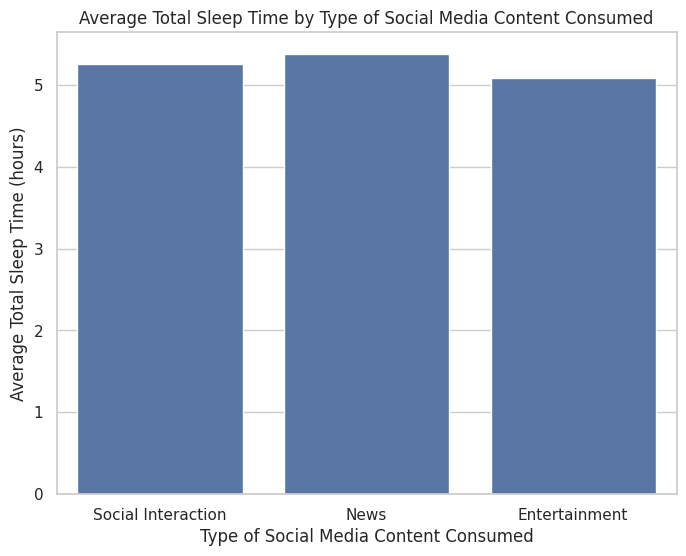

In [11]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="Type of Social Media Content Consumed", y="Total Sleep Time (hours)", data=df, errorbar=None)

plt.title("Average Total Sleep Time by Type of Social Media Content Consumed")
plt.xlabel("Type of Social Media Content Consumed")
plt.ylabel("Average Total Sleep Time (hours)")
plt.xticks(rotation=0, ha='center')
plt.show()

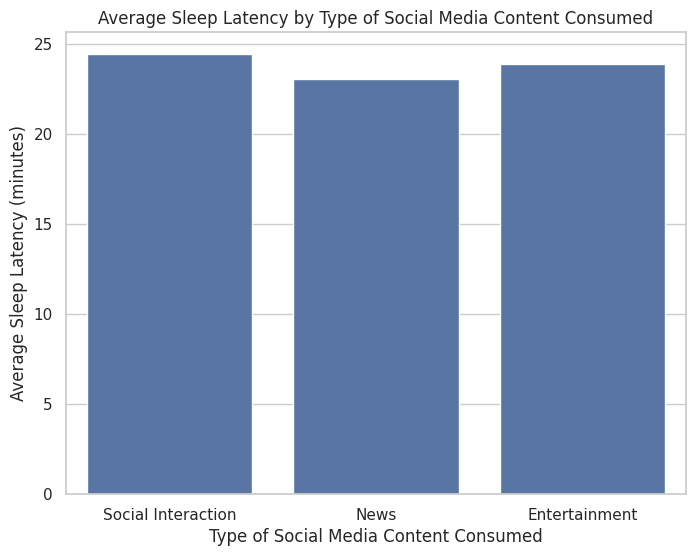

In [12]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="Type of Social Media Content Consumed", y="Sleep Latency (minutes)", data=df, errorbar=None)

plt.title("Average Sleep Latency by Type of Social Media Content Consumed")
plt.xlabel("Type of Social Media Content Consumed")
plt.ylabel("Average Sleep Latency (minutes)")
plt.xticks(rotation=0, ha='center')
plt.show()

#### Blue Light Exposure vs. Melatonin Levels for everyone

In [ ]:
data_copy = df.copy()
data_copy.loc[:, 'Screen Time Bin'] = pd.qcut(data_copy['Pre-Sleep Social Media Use Duration (minutes)'], 4, labels=["Low", "Medium", "High", "Very High"])
data_copy.loc[:, 'Blue Light Exposure Minutes Bin'] = pd.qcut(data_copy['Blue Light Exposure Before Sleep (minutes)'], 4, labels=["Low", "Medium", "High", "Very High"])
vmin, vmax = data_copy['Melatonin Level (pg/mL)'].min(), data_copy['Melatonin Level (pg/mL)'].max()

def plot_heatmap(data, **kwargs):
    data_pivot = data.pivot_table(index='Blue Light Exposure Minutes Bin', columns='Screen Time Bin', values='Melatonin Level (pg/mL)', aggfunc='mean', observed=True)
    sns.heatmap(data_pivot, annot=True, cmap="coolwarm", fmt=".1f", cbar=False, vmin=vmin, vmax=vmax, **kwargs)

g = sns.FacetGrid(data_copy, col='Age Group', col_wrap=2, height=5, margin_titles=True)
g.map_dataframe(plot_heatmap)
g.set_titles(col_template="{col_name}") 
g.fig.suptitle('Average Melatonin Levels by Screen Time and Blue Light Exposure Across Age Groups', y=1.05)

cbar_ax = g.fig.add_axes([1.01, 0.15, 0.03, 0.7])
plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar_ax.set_title('Melatonin Level (pg/mL)')

g.fig.subplots_adjust(top=0.97, right=0.8)

for ax in g.axes.flatten():
    ax.set_xlabel('Screen Time Bins')
    ax.set_ylabel('Blue Light Exposure Minutes Bins')

plt.show()

## Data Modeling Using Linear Regression
____________
#### Data Preparation:

1. Decide on which features (independent variables) to include in the model.

2. Ensure there are no missing values in the data. If there are, decide whether to fill them with a statistic (mean, median) or remove the rows/columns.

3. Divide the data into training and testing sets to ensure the model can be validated independently.

#### Model Fitting:

4. Create an instance of the Linear Regression model.

5. Fit the model to the training data.

6. Use Polynomial Features and Cross Model to Fine Tune Model

#### Model Evaluation:

7. Use the model to make predictions on the test data.

8. Evaluate the model's performance using metrics like R² (explains variance).

#### Interpretation:

9.  Look at the coefficients to understand the impact of each feature.

910. Based on the coefficients and the performance metrics, conclude how the features affect sleep quality.

In [14]:
X = df[[
    'Pre-Sleep Social Media Use Duration (minutes)',
    'Blue Light Exposure Before Sleep (minutes)',
    'Sleep Latency (minutes)',
    'Melatonin Level (pg/mL)'
]]
y = df['Sleep Efficiency (%)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
feature_names = X.columns

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Pre-Sleep Social Media Use Duration (minutes): -0.0385
Blue Light Exposure Before Sleep (minutes): 0.0140
Sleep Latency (minutes): -0.1888
Melatonin Level (pg/mL): 0.3053


In [17]:
# polynomial degree
degree = 2

# make the pipeline
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)

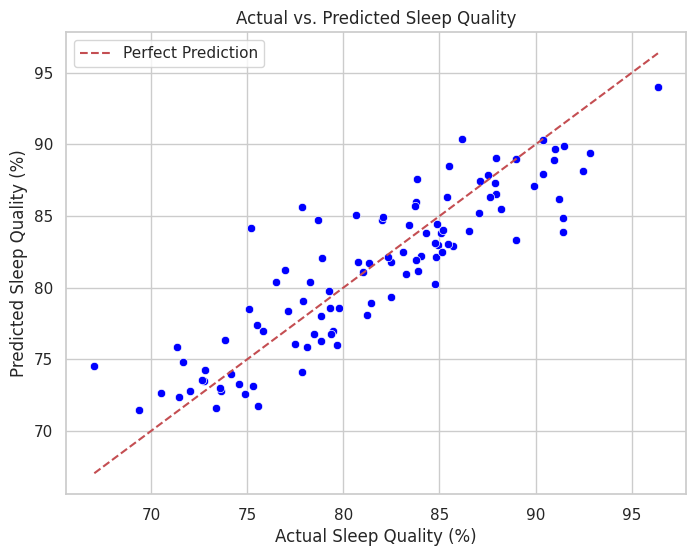

In [18]:
# scatterplot of predictions vs actual values with a line of best fit
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Sleep Quality (%)')
plt.ylabel('Predicted Sleep Quality (%)')
plt.title('Actual vs. Predicted Sleep Quality')
plt.legend()
plt.show()

In [19]:
scores = cross_val_score(pipeline, X, y, cv=3)  # 3-fold cross validation
print("Cross-validated scores:", scores)
print("Average R² score:", np.mean(scores))

Cross-validated scores: [0.85178105 0.81013184 0.80797622]
Average R² score: 0.8232963713002426
